In [2]:
!pip install PyMySQL

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.3 MB/s eta 0:00:00


# Connect to Database and load dataset

In [3]:
import pymysql.cursors

In [ ]:
host = 'den1.mysql6.gear.host'
db = 'situation'
usr = 'situation'
psword = input()

# Connect to the database
connection = pymysql.connect(host=host, user=usr, password=psword, database=db, cursorclass=pymysql.cursors.DictCursor)

In [5]:
import pandas as pd

In [6]:
#UserId = 'SomeDeviceName'
sql = "SELECT * FROM u21_labtimeaccountingrl"

with connection.cursor() as cursor:
   cursor.execute(sql)
   df_raw = pd.DataFrame(data=cursor.fetchall(), index= None)

In [7]:
df_raw.head(10)

,ExperimentID,TaskID,TaskDescription,StartTime,EndTime,TotalTime,Reward,ExperimentGroup
0,144,2,cleaning,2024-01-01 09:00:00,2024-01-01 09:30:00,161,14,Ethylvanillin
1,147,4,benchtop,2024-01-01 10:00:00,2024-01-01 10:30:00,128,5,Ethylvanillin
2,164,1,precursor,2024-01-01 11:00:00,2024-01-01 11:30:00,72,8,Guaiacol
3,167,4,benchtop,2024-01-01 12:00:00,2024-01-01 12:30:00,142,5,ortho-Vanillin
4,167,3,analytics,2024-01-01 13:00:00,2024-01-01 13:30:00,179,1,ortho-Vanillin
5,109,1,precursor,2024-01-01 14:00:00,2024-01-01 14:30:00,157,28,ortho-Vanillin
6,183,4,cleaning,2024-01-01 15:00:00,2024-01-01 15:30:00,30,39,ortho-Vanillin
7,121,4,precursor,2024-01-01 16:00:00,2024-01-01 16:30:00,168,-9,Ethylvanillin
8,136,3,analytics,2024-01-01 17:00:00,2024-01-01 17:30:00,144,21,Ethylvanillin
9,187,4,precursor,2024-01-01 18:00:00,2024-01-01 18:30:00,73,14,ortho-Vanillin


In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

**TotalTime Overview**

count     44.000000
mean     100.204545
std       47.594010
min       30.000000
25%       61.500000
50%       90.000000
75%      146.500000
max      179.000000
Name: TotalTime, dtype: float64


Text(0.5, 0, 'ExperimentID')

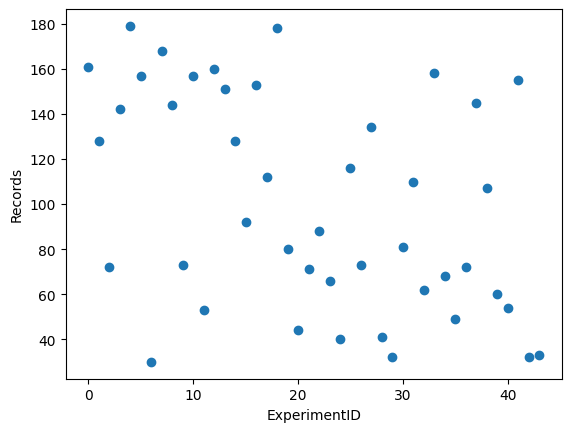

In [22]:
print(df_raw['TotalTime'].describe())

fig, ax = plt.subplots()
ax.scatter(range(len(df_raw)), df_raw['TotalTime'])
ax.set_ylabel('Records')
ax.set_xlabel('ExperimentID')

<ipython-input-17-62c0920e77c6>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.colums = ['TaskID', 'TotalTime']


Text(0.5, 0, 'CaseID')

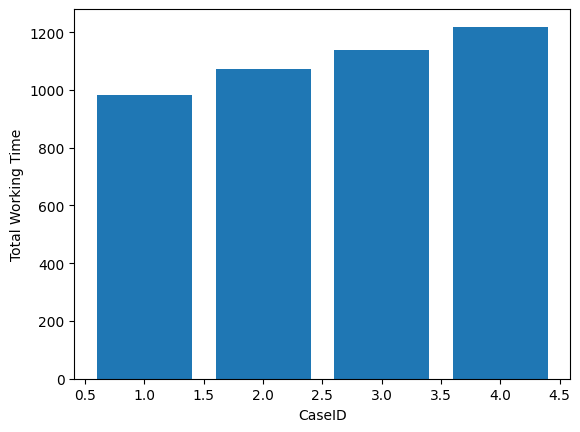

In [17]:
caseID_grouped = df_raw.groupby(['TaskID'])
result = caseID_grouped['TotalTime'].sum().reset_index()
result.colums = ['TaskID', 'TotalTime']

fig, ax = plt.subplots()
ax.bar(result['TaskID'], result['TotalTime'])
ax.set_ylabel('Total Working Time')
ax.set_xlabel('CaseID')

**Task Overview** / Overview on the task categories and their counts for each case ID, Violinplot

<ipython-input-12-188dc1cfed32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_raw, x='TaskID', y='TaskDescription', inner='stick', palette='Dark2')


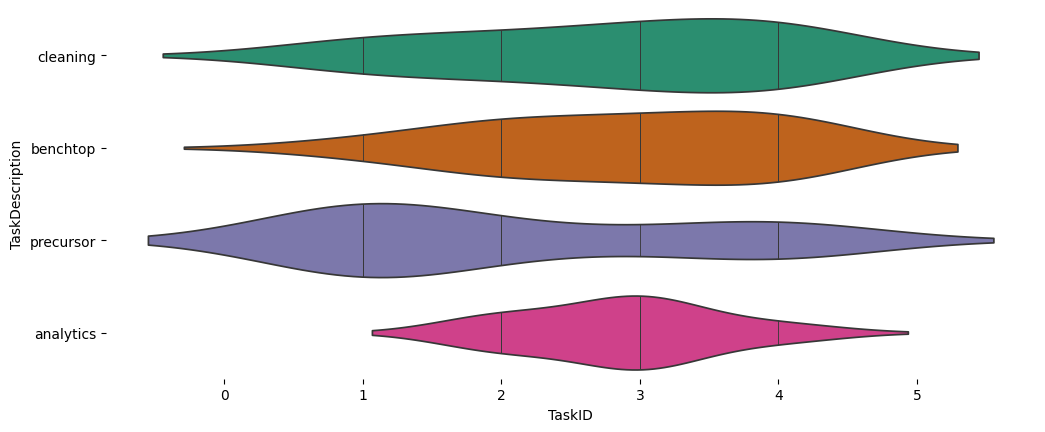

In [12]:
figsize = (12, 1.2 * len(df_raw['TaskDescription'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_raw, x='TaskID', y='TaskDescription', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)